# Import required libraries

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mlp import MLP, ActivationFunction

# Prepare MNIST

In [2]:
# Load and preprocess the MNIST dataset
mnist = load_digits()
X_mnist, y_mnist = mnist.data, mnist.target

# Split the data into training and test sets
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

# Further split the training data into new training and validation sets
X_mnist_train, X_mnist_val, y_mnist_train, y_mnist_val = train_test_split(X_mnist_train, y_mnist_train, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_mnist_train = scaler.fit_transform(X_mnist_train)
X_mnist_val = scaler.transform(X_mnist_val)
X_mnist_test = scaler.transform(X_mnist_test)

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_mnist_train = encoder.fit_transform(y_mnist_train.reshape(-1, 1))
y_mnist_val = encoder.transform(y_mnist_val.reshape(-1, 1))
y_mnist_test = encoder.transform(y_mnist_test.reshape(-1, 1))

/Users/robertnasuti/.local/share/virtualenvs/MultiLayerPerceptron-cyc80dTD/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Train custom neural network on MNIST using relu with adam like optimizer

iteration 1 of 24
iteration 2 of 24
iteration 3 of 24
iteration 4 of 24
iteration 5 of 24
iteration 6 of 24
iteration 7 of 24
iteration 8 of 24
iteration 9 of 24
iteration 10 of 24
iteration 11 of 24
iteration 12 of 24
iteration 13 of 24
iteration 14 of 24
iteration 15 of 24
iteration 16 of 24
iteration 17 of 24
iteration 18 of 24
iteration 19 of 24
iteration 20 of 24
iteration 21 of 24
iteration 22 of 24
iteration 23 of 24
iteration 24 of 24
Learning Rate: 1e-06, Beta1: 0.9, Beta2: 0.99
    Max Training Accuracy: 0.0479
    Max Validation Accuracy: 0.0521
    Min Training Loss: 1.6820
    Min Validation Loss: 1.6617
------------------------------------------------
Learning Rate: 1e-06, Beta1: 0.9, Beta2: 0.999
    Max Training Accuracy: 0.0557
    Max Validation Accuracy: 0.0660
    Min Training Loss: 1.0127
    Min Validation Loss: 0.9201
------------------------------------------------
Learning Rate: 1e-06, Beta1: 0.95, Beta2: 0.99
    Max Training Accuracy: 0.0592
    Max Validatio

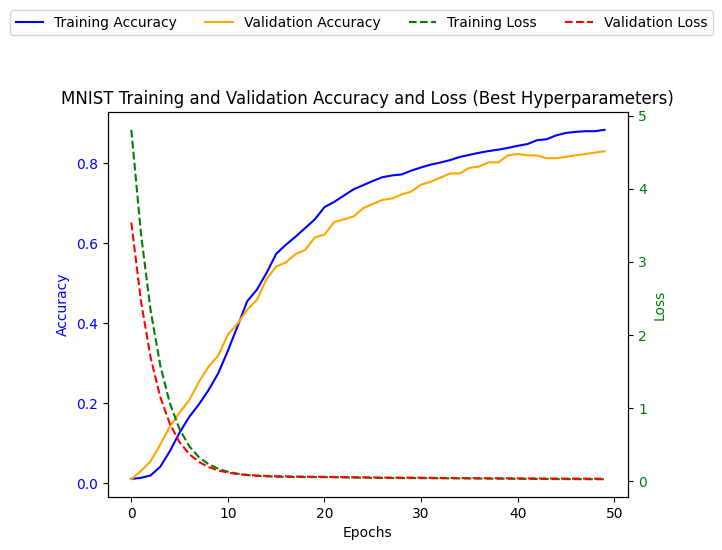

Best Learning Rate: 0.01
Best Beta1: 0.9
Best Beta2: 0.999


In [3]:
# Hyperparameters to search over
learning_rates = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
beta1_values = [0.9, 0.95]
beta2_values = [0.99, 0.999]

best_val_accuracy = 0  # Track the best validation accuracy
best_hyperparams = None  # Track the best combination of hyperparameters
best_results = None  # Track the best results for plotting

# Dictionary to store results
results_dict = {}

total_iterations = len(learning_rates) * len(beta1_values) * len(beta2_values)
current_iteration = 1

# Grid search over learning rate, beta1, and beta2
for lr in learning_rates:
    for beta1 in beta1_values:
        for beta2 in beta2_values:
            print(f"iteration {current_iteration} of {total_iterations}")
            # Initialize and train the MLP on MNIST using Adam optimizer
            mlp_mnist = MLP(input_size=64, hidden_size=32, output_size=10, learning_rate=lr,
                            activation_function=ActivationFunction.RELU,
                            beta1=beta1, beta2=beta2, use_adam=True)
            mnist_training_accuracies, mnist_validation_accuracies, mnist_training_losses, mnist_validation_losses = mlp_mnist.train(X_mnist_train, y_mnist_train, X_mnist_val, y_mnist_val, epochs=50)

            # Store results in dictionary
            results_dict[(lr, beta1, beta2)] = {
                'max_train_accuracy': max(mnist_training_accuracies),
                'max_val_accuracy': max(mnist_validation_accuracies),
                'min_train_loss': min(mnist_training_losses),
                'min_val_loss': min(mnist_validation_losses)
            }

            # Check if this combination has better validation accuracy
            if max(mnist_validation_accuracies) > best_val_accuracy:
                best_val_accuracy = max(mnist_validation_accuracies)
                best_hyperparams = (lr, beta1, beta2)
                best_results = (mnist_training_accuracies, mnist_validation_accuracies, mnist_training_losses, mnist_validation_losses)
            current_iteration += 1

# Print results for all combinations
for (lr, beta1, beta2), metrics in results_dict.items():
    print(f"Learning Rate: {lr}, Beta1: {beta1}, Beta2: {beta2}")
    print(f"    Max Training Accuracy: {metrics['max_train_accuracy']:.4f}")
    print(f"    Max Validation Accuracy: {metrics['max_val_accuracy']:.4f}")
    print(f"    Min Training Loss: {metrics['min_train_loss']:.4f}")
    print(f"    Min Validation Loss: {metrics['min_val_loss']:.4f}")
    print("------------------------------------------------")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Extract the best results for plotting
best_train_acc, best_val_acc, best_train_loss, best_val_loss = best_results

# Plot training and validation accuracy from the best run
ax1.plot(best_train_acc, label='Training Accuracy', color='blue')
ax1.plot(best_val_acc, label='Validation Accuracy', color='orange')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.plot(best_train_loss, label='Training Loss', linestyle='--', color='green')
ax2.plot(best_val_loss, label='Validation Loss', linestyle='--', color='red')
ax2.set_ylabel('Loss', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and a legend
plt.title('MNIST Training and Validation Accuracy and Loss (Best Hyperparameters)')
fig.tight_layout()  # Adjust the layout
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)
plt.show()

# Display the optimal hyperparameters
print(f"Best Learning Rate: {best_hyperparams[0]}")
print(f"Best Beta1: {best_hyperparams[1]}")
print(f"Best Beta2: {best_hyperparams[2]}")


# Train custom neural network on MNIST using sigmoid with adam

iteration 1 of 24
iteration 2 of 24
iteration 3 of 24
iteration 4 of 24
iteration 5 of 24
iteration 6 of 24
iteration 7 of 24
iteration 8 of 24
iteration 9 of 24
iteration 10 of 24
iteration 11 of 24
iteration 12 of 24
iteration 13 of 24
iteration 14 of 24
iteration 15 of 24
iteration 16 of 24
iteration 17 of 24
iteration 18 of 24
iteration 19 of 24
iteration 20 of 24
iteration 21 of 24
iteration 22 of 24
iteration 23 of 24
iteration 24 of 24
Learning Rate: 1e-06, Beta1: 0.9, Beta2: 0.99
    Max Training Accuracy: 0.0992
    Max Validation Accuracy: 0.0764
    Min Training Loss: 0.8070
    Min Validation Loss: 0.8100
------------------------------------------------
Learning Rate: 1e-06, Beta1: 0.9, Beta2: 0.999
    Max Training Accuracy: 0.0914
    Max Validation Accuracy: 0.1042
    Min Training Loss: 0.8077
    Min Validation Loss: 0.8130
------------------------------------------------
Learning Rate: 1e-06, Beta1: 0.95, Beta2: 0.99
    Max Training Accuracy: 0.0914
    Max Validatio

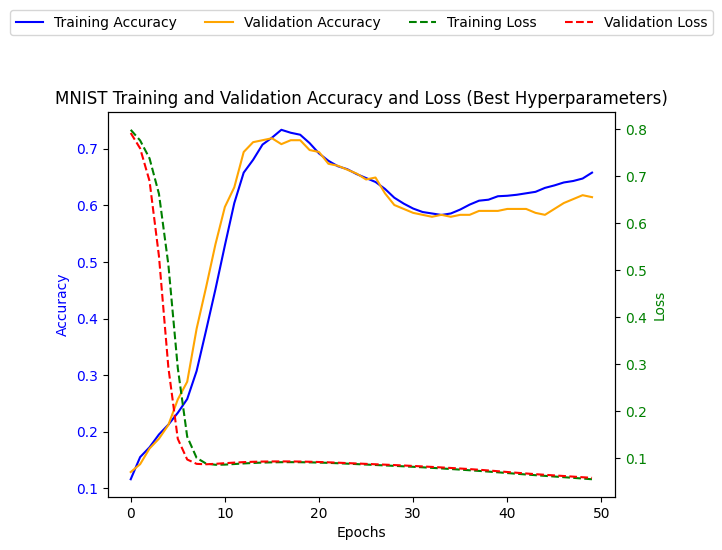

Best Learning Rate: 0.1
Best Beta1: 0.9
Best Beta2: 0.99


In [6]:
# Hyperparameters to search over
learning_rates = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
beta1_values = [0.9, 0.95]
beta2_values = [0.99, 0.999]

best_val_accuracy = 0  # Track the best validation accuracy
best_hyperparams = None  # Track the best combination of hyperparameters
best_results = None  # Track the best results for plotting

# Dictionary to store results
results_dict = {}

total_iterations = len(learning_rates) * len(beta1_values) * len(beta2_values)
current_iteration = 1

# Grid search over learning rate, beta1, and beta2
for lr in learning_rates:
    for beta1 in beta1_values:
        for beta2 in beta2_values:
            print(f"iteration {current_iteration} of {total_iterations}")
            # Initialize and train the MLP on MNIST using Adam optimizer
            mlp_mnist = MLP(input_size=64, hidden_size=32, output_size=10, learning_rate=lr,
                            activation_function=ActivationFunction.SIGMOID,
                            beta1=beta1, beta2=beta2, use_adam=True)
            mnist_training_accuracies, mnist_validation_accuracies, mnist_training_losses, mnist_validation_losses = mlp_mnist.train(X_mnist_train, y_mnist_train, X_mnist_val, y_mnist_val, epochs=50)

            # Store results in dictionary
            results_dict[(lr, beta1, beta2)] = {
                'max_train_accuracy': max(mnist_training_accuracies),
                'max_val_accuracy': max(mnist_validation_accuracies),
                'min_train_loss': min(mnist_training_losses),
                'min_val_loss': min(mnist_validation_losses)
            }

            # Check if this combination has better validation accuracy
            if max(mnist_validation_accuracies) > best_val_accuracy:
                best_val_accuracy = max(mnist_validation_accuracies)
                best_hyperparams = (lr, beta1, beta2)
                best_results = (mnist_training_accuracies, mnist_validation_accuracies, mnist_training_losses, mnist_validation_losses)
            current_iteration += 1

# Print results for all combinations
for (lr, beta1, beta2), metrics in results_dict.items():
    print(f"Learning Rate: {lr}, Beta1: {beta1}, Beta2: {beta2}")
    print(f"    Max Training Accuracy: {metrics['max_train_accuracy']:.4f}")
    print(f"    Max Validation Accuracy: {metrics['max_val_accuracy']:.4f}")
    print(f"    Min Training Loss: {metrics['min_train_loss']:.4f}")
    print(f"    Min Validation Loss: {metrics['min_val_loss']:.4f}")
    print("------------------------------------------------")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Extract the best results for plotting
best_train_acc, best_val_acc, best_train_loss, best_val_loss = best_results

# Plot training and validation accuracy from the best run
ax1.plot(best_train_acc, label='Training Accuracy', color='blue')
ax1.plot(best_val_acc, label='Validation Accuracy', color='orange')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.plot(best_train_loss, label='Training Loss', linestyle='--', color='green')
ax2.plot(best_val_loss, label='Validation Loss', linestyle='--', color='red')
ax2.set_ylabel('Loss', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and a legend
plt.title('MNIST Training and Validation Accuracy and Loss (Best Hyperparameters)')
fig.tight_layout()  # Adjust the layout
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)
plt.show()

# Display the optimal hyperparameters
print(f"Best Learning Rate: {best_hyperparams[0]}")
print(f"Best Beta1: {best_hyperparams[1]}")
print(f"Best Beta2: {best_hyperparams[2]}")


# Train custom neural network on MNIST using tanh with adam

iteration 1 of 24
iteration 2 of 24
iteration 3 of 24
iteration 4 of 24
iteration 5 of 24
iteration 6 of 24
iteration 7 of 24
iteration 8 of 24
iteration 9 of 24
iteration 10 of 24
iteration 11 of 24
iteration 12 of 24
iteration 13 of 24
iteration 14 of 24
iteration 15 of 24
iteration 16 of 24
iteration 17 of 24
iteration 18 of 24
iteration 19 of 24
iteration 20 of 24
iteration 21 of 24
iteration 22 of 24
iteration 23 of 24
iteration 24 of 24
Learning Rate: 1e-06, Beta1: 0.9, Beta2: 0.99
    Max Training Accuracy: 0.1236
    Max Validation Accuracy: 0.1389
    Min Training Loss: 1.0644
    Min Validation Loss: 1.0464
------------------------------------------------
Learning Rate: 1e-06, Beta1: 0.9, Beta2: 0.999
    Max Training Accuracy: 0.1471
    Max Validation Accuracy: 0.1528
    Min Training Loss: 1.0602
    Min Validation Loss: 1.0396
------------------------------------------------
Learning Rate: 1e-06, Beta1: 0.95, Beta2: 0.99
    Max Training Accuracy: 0.0879
    Max Validatio

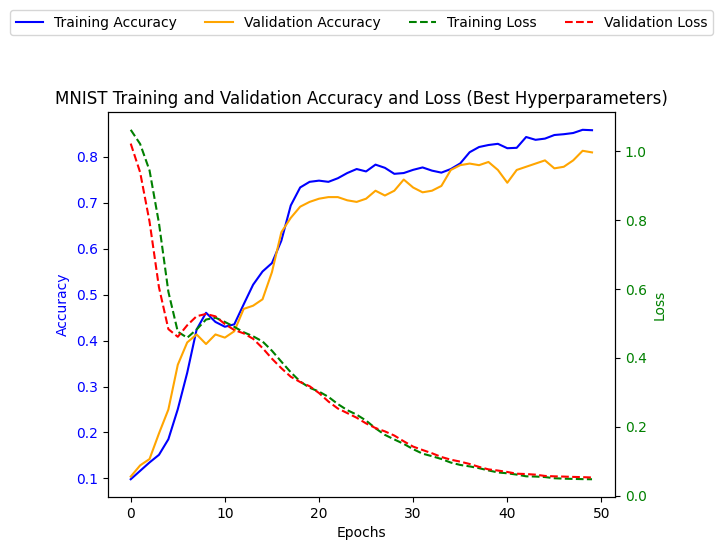

Best Learning Rate: 0.1
Best Beta1: 0.9
Best Beta2: 0.99


In [5]:
# Hyperparameters to search over
learning_rates = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
beta1_values = [0.9, 0.95]
beta2_values = [0.99, 0.999]

best_val_accuracy = 0  # Track the best validation accuracy
best_hyperparams = None  # Track the best combination of hyperparameters
best_results = None  # Track the best results for plotting

# Dictionary to store results
results_dict = {}

total_iterations = len(learning_rates) * len(beta1_values) * len(beta2_values)
current_iteration = 1

# Grid search over learning rate, beta1, and beta2
for lr in learning_rates:
    for beta1 in beta1_values:
        for beta2 in beta2_values:
            print(f"iteration {current_iteration} of {total_iterations}")
            # Initialize and train the MLP on MNIST using Adam optimizer
            mlp_mnist = MLP(input_size=64, hidden_size=32, output_size=10, learning_rate=lr,
                            activation_function=ActivationFunction.TANH,
                            beta1=beta1, beta2=beta2, use_adam=True)
            mnist_training_accuracies, mnist_validation_accuracies, mnist_training_losses, mnist_validation_losses = mlp_mnist.train(X_mnist_train, y_mnist_train, X_mnist_val, y_mnist_val, epochs=50)

            # Store results in dictionary
            results_dict[(lr, beta1, beta2)] = {
                'max_train_accuracy': max(mnist_training_accuracies),
                'max_val_accuracy': max(mnist_validation_accuracies),
                'min_train_loss': min(mnist_training_losses),
                'min_val_loss': min(mnist_validation_losses)
            }

            # Check if this combination has better validation accuracy
            if max(mnist_validation_accuracies) > best_val_accuracy:
                best_val_accuracy = max(mnist_validation_accuracies)
                best_hyperparams = (lr, beta1, beta2)
                best_results = (mnist_training_accuracies, mnist_validation_accuracies, mnist_training_losses, mnist_validation_losses)
            current_iteration += 1

# Print results for all combinations
for (lr, beta1, beta2), metrics in results_dict.items():
    print(f"Learning Rate: {lr}, Beta1: {beta1}, Beta2: {beta2}")
    print(f"    Max Training Accuracy: {metrics['max_train_accuracy']:.4f}")
    print(f"    Max Validation Accuracy: {metrics['max_val_accuracy']:.4f}")
    print(f"    Min Training Loss: {metrics['min_train_loss']:.4f}")
    print(f"    Min Validation Loss: {metrics['min_val_loss']:.4f}")
    print("------------------------------------------------")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Extract the best results for plotting
best_train_acc, best_val_acc, best_train_loss, best_val_loss = best_results

# Plot training and validation accuracy from the best run
ax1.plot(best_train_acc, label='Training Accuracy', color='blue')
ax1.plot(best_val_acc, label='Validation Accuracy', color='orange')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.plot(best_train_loss, label='Training Loss', linestyle='--', color='green')
ax2.plot(best_val_loss, label='Validation Loss', linestyle='--', color='red')
ax2.set_ylabel('Loss', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and a legend
plt.title('MNIST Training and Validation Accuracy and Loss (Best Hyperparameters)')
fig.tight_layout()  # Adjust the layout
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)
plt.show()

# Display the optimal hyperparameters
print(f"Best Learning Rate: {best_hyperparams[0]}")
print(f"Best Beta1: {best_hyperparams[1]}")
print(f"Best Beta2: {best_hyperparams[2]}")
